# Introduction to SymPy


### _Let python do the maths !!_

SymPy is a Python library for symbolic mathematics. 

see : http://www.sympy.org/en/index.html



# Insight from an example : Evaluating the price of an option (in finance)

Why an example from financial maths ?

- Everyone has a vague idea of the concepts

- Very nasty mathematics (in the sense of long calculus) though not conceptually too complex $\rightarrow$ perfect to illustrate the use of SymPy



# Some basics around financial products

- what is a share ? https://en.wikipedia.org/wiki/Share_%28finance%29

- what is an option ? https://en.wikipedia.org/wiki/Option_%28finance%29

# The share market

In [121]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

Let's download the history of the shares of the company "Google Inc." from Sep. 2005 to Sep. 2012

of course, google has this :

https://www.google.com/finance/historical?cid=694653&startdate=Sep+12%2C+2005&enddate=Sep+11%2C+2012&num=30&ei=EPbyVcDDKNjDUJSCuOAC

we download the following spreadsheet :

http://www.google.com/finance/historical?cid=694653&startdate=Sep+12%2C+2005&enddate=Sep+11%2C+2012&num=30&ei=EPbyVcDDKNjDUJSCuOAC&output=csv

In [122]:
# then we open it with numpy, it's a csv file, so you open it with numpy.recfromcsv

FILE = '/home/yann/Desktop/googl.csv' # put where you download files

GE_raw_data = np.recfromcsv(FILE)


In [123]:
# numpy is so smart, it guesses how the data look like

# let's look at the first element
GE_raw_data[-1]

('12-Sep-05', 151.03, 155.87, 150.65, 155.02, 10392015)

from the website we know that those values correspond to respectively

- Date

- Value at market opening

- Lowest value during the day

- Highest value during the day

- Value at market closing

- Volume of exchanged shares

So let's reformat the data, to have this more clearly

in particular, the date is a string, that is not so convenient for plotting !

In [124]:
data = {} # let's construct the data as a dictionary

monthes = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
def convert_month_in_year_fraction(month):
    # a month is a twelvth of a year
    #return 1./12.*float([0][0])
    if len(np.argwhere(monthes==month))==0:
        print month
    return 1./12.*float(np.argwhere(month==monthes, )[0][0])

def convert_day_in_year_fraction(day):
    return day/365.

data['date'], data['opening'], data['low'], data['high'], data['closing'], data['volume'] = \
       [np.zeros(len(GE_raw_data), dtype=float) for i in range(6)] # we initialize the arrays
    
    
for i in range(len(GE_raw_data)):
    # reformating the date
    Date = GE_raw_data[i][0]
    day, month, year = Date.split('-') # we obtain 3 strings by splitting the date with '-'
    data['date'][i] = float(year)+convert_month_in_year_fraction(month)+convert_day_in_year_fraction(float(day))
    # then 
    data['opening'][i], data['low'][i], data['high'][i], data['closing'][i], data['volume'][i] =\
       [GE_raw_data[i][j] for j in range(1,6)] # we initialize the arrays
    


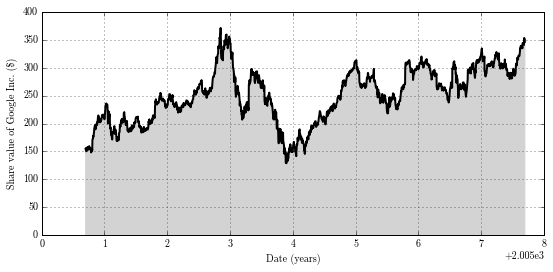

In [126]:
fig, ax = plt.subplots(1, figsize=(9,4))
ax.plot(2000+data['date'], data['closing'], 'k-', lw=2)
plt.fill_between(2000+data['date'], data['closing'], 0*data['closing'], color='lightgray')#to visually enhance positive values ^^
plt.grid()
ax.set_xlabel('Date (years)')
ax.set_ylabel('Share value of Google Inc. (\$)')


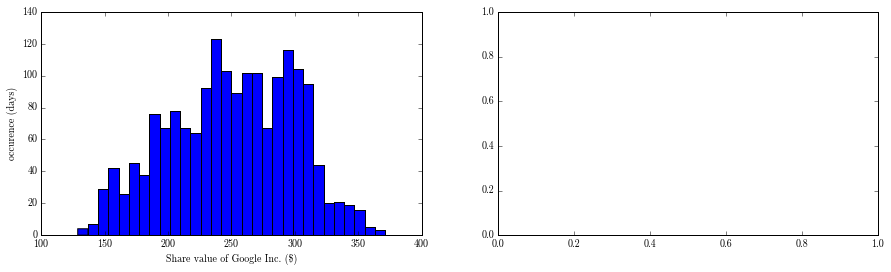

In [129]:
fig, AX = plt.subplots(1, 2, figsize=(15, 4))
AX[0].hist(data['closing'], bins=30)
AX[0].set_xlabel('Share value of Google Inc. (\$)')
AX[0].set_ylabel('occurence (days)')